In [1]:
import pandas as pd
import unicodedata
import os
from collections import defaultdict

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
def word_cloud(text, title, savefile, keywords=False):

    if keywords:
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(text)
    else:
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate(text)
    
    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.title(title)
    plt.savefig(savefile+title.replace(" ", "")+".png", dpi=300, bbox_inches='tight')
    plt.show()
    return wordcloud

# Compare Keywords and Keyfrequency wordclouds

In [4]:
def compare_wordclouds(text1,text2,title1,title2,keywords1=False,keywords2=True, max_words=50):

    if keywords1:
        wordcloud1 = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(text1)
    else:
        wordcloud1 = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(text1)

    if keywords2:
        wordcloud2 = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(text2)
    else:
        wordcloud2 = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(text2)
    
    # Create a figure with 1 row and 2 columns for the subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the first word cloud
    ax1.imshow(wordcloud1, interpolation='bilinear')
    ax1.axis('off')  # Turn off axis
    ax1.set_title(title1)
    
    # Display the second word cloud
    ax2.imshow(wordcloud2, interpolation='bilinear')
    ax2.axis('off')  # Turn off axis
    ax2.set_title(title2)
    
    plt.show()


In [5]:
def read_abstracts(abstracts_folder_path):
    
    abstracts_per_year = []
    abstracts_paths = [abstracts_folder_path+f for f in os.listdir(abstracts_folder_path) if os.path.isfile(os.path.join(abstracts_folder_path, f))]
    abstracts_paths = sorted(abstracts_paths)
    
    for path in abstracts_paths:
        with open(path, 'r') as file:
            abstracts_per_year.append(file.read())

    min_year = abstracts_paths[0][-8:-4]
    max_year = abstracts_paths[-1][-8:-4]

    return abstracts_per_year, min_year, max_year

In [6]:
def read_keywords(keywords_folder_path):
    keywords_per_year = []
    keywords_paths = [keywords_folder_path+f for f in os.listdir(keywords_folder_path) if os.path.isfile(os.path.join(keywords_folder_path, f))]

    for path in keywords_paths:
        with open(path, 'rb') as file:
            keywords = pickle.load(file)
            keywords_per_year.append(dict(keywords))

    min_year = abstracts_paths[0][-8:-4]
    max_year = abstracts_paths[-1][-8:-4]

    return keywords_per_year, min_year, max_year

# ECMFA

In [7]:
ecmfa_file = ""
save_ecmfa_wordmap = ""

In [8]:
df = pd.read_csv(ecmfa_file+'ecmfa.csv', quotechar='"')

In [9]:
min_year_ecmfa = int(df['Publication Year'].min())

In [10]:
max_year_ecmfa = int(df['Publication Year'].max())

In [11]:
abstracts_per_year_ecmfa = []
for year in range(min_year_ecmfa, max_year_ecmfa+1):
    df_year = df[df['Publication Year'] == year]
    df_abs = df_year['Abstract']
    abstract_year = ""
    for r in df_abs:
        abstract_year += str(r) + "\n"

    abstract_year = unicodedata.normalize('NFKD', abstract_year).encode('ascii', 'ignore').decode('ascii')
    abstracts_per_year_ecmfa.append(abstract_year)
    

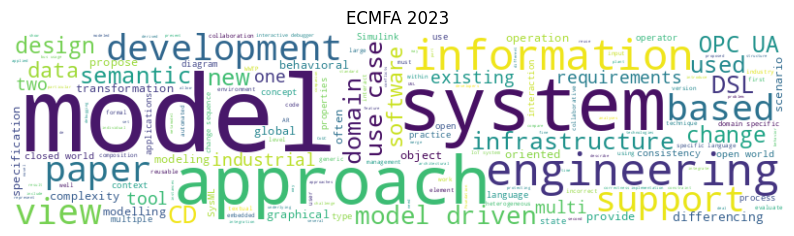

In [12]:
text = str(abstracts_per_year_ecmfa[18]).replace("nan", "")
wc = word_cloud(text, "ECMFA 2023", save_ecmfa_wordmap)

In [13]:
wc.words_

{'model': 1.0,
 'system': 0.41935483870967744,
 'approach': 0.3225806451612903,
 'engineering': 0.22580645161290322,
 'information': 0.20967741935483872,
 'development': 0.1774193548387097,
 'paper': 0.1774193548387097,
 'support': 0.1774193548387097,
 'based': 0.1774193548387097,
 'view': 0.1774193548387097,
 'model driven': 0.16129032258064516,
 'domain': 0.14516129032258066,
 'DSL': 0.14516129032258066,
 'infrastructure': 0.14516129032258066,
 'CD': 0.14516129032258066,
 'use case': 0.14516129032258066,
 'used': 0.12903225806451613,
 'semantic': 0.12903225806451613,
 'new': 0.12903225806451613,
 'design': 0.12903225806451613,
 'change': 0.12903225806451613,
 'OPC UA': 0.12903225806451613,
 'software': 0.11290322580645161,
 'data': 0.11290322580645161,
 'requirements': 0.11290322580645161,
 'existing': 0.11290322580645161,
 'industrial': 0.11290322580645161,
 'one': 0.11290322580645161,
 'tool': 0.11290322580645161,
 'two': 0.11290322580645161,
 'multi': 0.11290322580645161,
 'differ

# MODELS

In [14]:
models_file = ""
save_models_wordmap = ""

In [15]:
df = pd.read_csv(models_file+'models.csv', quotechar='"')

In [16]:
min_year_models = int(df['Publication Year'].min())

In [17]:
max_year_models = int(df['Publication Year'].max())

In [18]:
abstracts_per_year_models = []
for year in range(min_year_models, max_year_models+1):
    df_year = df[df['Publication Year'] == year]
    df_abs = df_year['Abstract']
    abstract_year = ""
    for r in df_abs:
        abstract_year += str(r) + "\n"
        
    abstract_year = unicodedata.normalize('NFKD', abstract_year).encode('ascii', 'ignore').decode('ascii')
    abstracts_per_year_models.append(abstract_year)
    

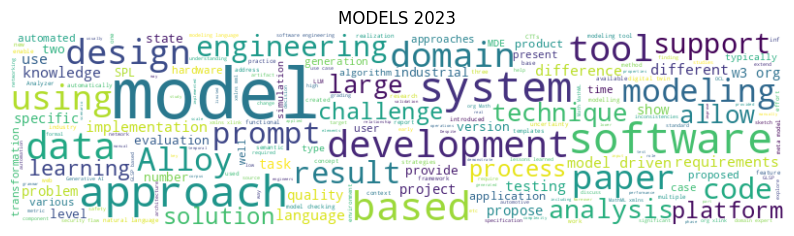

In [19]:
wm = word_cloud(abstracts_per_year_models[18], "MODELS 2023", save_models_wordmap)

In [20]:
wm.words_

{'model': 1.0,
 'approach': 0.2803738317757009,
 'software': 0.27102803738317754,
 'system': 0.27102803738317754,
 'based': 0.2336448598130841,
 'data': 0.205607476635514,
 'development': 0.19626168224299065,
 'tool': 0.18691588785046728,
 'design': 0.18691588785046728,
 'paper': 0.18691588785046728,
 'domain': 0.18691588785046728,
 'using': 0.17757009345794392,
 'modeling': 0.1588785046728972,
 'Alloy': 0.1588785046728972,
 'prompt': 0.14018691588785046,
 'result': 0.14018691588785046,
 'code': 0.1308411214953271,
 'engineering': 0.1308411214953271,
 'support': 0.12149532710280374,
 'analysis': 0.12149532710280374,
 'allow': 0.11214953271028037,
 'technique': 0.11214953271028037,
 'large': 0.11214953271028037,
 'challenge': 0.11214953271028037,
 'process': 0.11214953271028037,
 'solution': 0.11214953271028037,
 'platform': 0.11214953271028037,
 'learning': 0.11214953271028037,
 'implementation': 0.102803738317757,
 'use': 0.102803738317757,
 'different': 0.102803738317757,
 'testing':

# MODELS-C

In [21]:
modelsc_file = ""
save_modelsc_wordmap = ""

In [22]:
df = pd.read_csv(modelsc_file+'models-c.csv', quotechar='"')

In [23]:
min_year_companion = int(df['Publication Year'].min())

In [24]:
max_year_companion = int(df['Publication Year'].max())

In [25]:
abstracts_per_year_companion = []
for year in range(min_year_companion, max_year_companion+1):
    df_year = df[df['Publication Year'] == year]
    df_abs = df_year['Abstract']
    df_title = df_year['Title']
    abstract_year = ""
    for t,a in zip(df_title,df_abs):
        abstract_year += str(t) + " " + str(a) + "\n"

    abstract_year = unicodedata.normalize('NFKD', abstract_year).encode('ascii', 'ignore').decode('ascii')
    abstracts_per_year_companion.append(abstract_year)

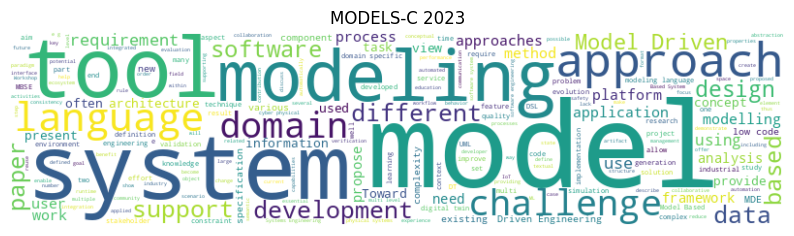

In [26]:
wc = word_cloud(abstracts_per_year_companion[18], "MODELS-C 2023", save_modelsc_wordmap)

In [27]:
wc.words_

{'model': 1.0,
 'system': 0.5462686567164179,
 'tool': 0.4537313432835821,
 'modeling': 0.37910447761194027,
 'approach': 0.3641791044776119,
 'language': 0.2507462686567164,
 'challenge': 0.22686567164179106,
 'domain': 0.22388059701492538,
 'development': 0.21791044776119403,
 'data': 0.21492537313432836,
 'different': 0.208955223880597,
 'support': 0.208955223880597,
 'based': 0.2,
 'paper': 0.2,
 'software': 0.2,
 'design': 0.1880597014925373,
 'Model Driven': 0.1880597014925373,
 'requirement': 0.18208955223880596,
 'use': 0.1791044776119403,
 'using': 0.16417910447761194,
 'approaches': 0.14328358208955225,
 'method': 0.1373134328358209,
 'process': 0.13134328358208955,
 'user': 0.13134328358208955,
 'work': 0.12835820895522387,
 'application': 0.12835820895522387,
 'platform': 0.12835820895522387,
 'modelling': 0.1253731343283582,
 'analysis': 0.11641791044776119,
 'framework': 0.11641791044776119,
 'propose': 0.11343283582089553,
 'need': 0.11343283582089553,
 'architecture': 0